#  Project Documentation
## Project Title: Exploring Arabic NLP Tasks – Traditional Methods

**Team Members:**  
- Muath AlShehri - 443016733  
- Abdullah Almohammed - 443016380
- Motaz Al-Ghamdi - 444012369

**Supervisor:** Dr. Fahman Saeed  
**Course:** CS365 - Natural Language Processing  
**Date:** May 2025

##Abstract

This project investigates traditional Natural Language Processing (NLP) techniques for Arabic text classification. We applied standard preprocessing steps such as normalization, stopword removal, and stemming, followed by feature extraction using TF-IDF. Four classical machine learning models were evaluated: Naive Bayes, Support Vector Machine (SVM), Decision Tree, and Random Forest. The dataset used was Kalemat, which contains Arabic text categorized into different topics. The models were compared based on accuracy and other classification metrics. Additionally, we experimented with extractive summarization using the LexRank algorithm and evaluated the generated summaries using BLEU and ROUGE scores.


## Traditional NLP Methods Used

This project focuses on traditional Natural Language Processing (NLP) techniques for Arabic text classification. The following methods were applied:

### Text Preprocessing:
- Normalization of Arabic characters (e.g., converting "أ", "إ", "آ" → "ا")
- Removal of punctuation and special symbols
- Removal of Arabic stop words
- Stemming using Arabic stemmers to reduce words to their root forms
- Tokenization

### Feature Extraction:
- TF-IDF (Term Frequency – Inverse Document Frequency)  
  Used to convert text into numerical vectors that reflect word importance.

### Machine Learning Algorithms:
- Multinomial Naive Bayes
- Support Vector Machine (SVM)  
- Random Forest Classifier

###  Evaluation Metrics: bold text
- Accuracy  
- Precision  
- Recall  
- F1-Score


## Load the Dataset

Loading the Arabic text dataset to be used for classification.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Kalemat (2).zip to Kalemat (2).zip


## Extract Dataset Zip File

This cell unzips the uploaded dataset file and extracts its contents to a specific folder for further use.


In [ ]:
import zipfile
import os

zip_path = list(uploaded.keys())[0]
extract_to = "/content/kalemat_unzipped"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipped to:", extract_to)


Unzipped to: /content/kalemat_unzipped


In [ ]:
!ls /content/kalemat_unzipped


Kalemat


##Download NLTK Resources

This cell downloads the required NLTK resources for Arabic text preprocessing, including stopwords and tokenization tools.


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

##Load and Organize Kalemat Dataset

This cell loops through the extracted folders of the Kalemat dataset, reads Arabic text files from each category, and stores them along with their labels in a DataFrame.


In [ ]:
import os
import pandas as pd

base_path = "/content/kalemat_unzipped/Kalemat"
texts = []
labels = []

for category_folder in os.listdir(base_path):
    cat_path = os.path.join(base_path, category_folder)
    if os.path.isdir(cat_path):
        inner_folders = os.listdir(cat_path)
        if inner_folders:
            for inner_folder in inner_folders:
                inner_path = os.path.join(cat_path, inner_folder)
                for filename in os.listdir(inner_path):
                    if filename.endswith(".txt"):
                        file_path = os.path.join(inner_path, filename)
                        with open(file_path, "r", encoding="utf-8") as file:
                            content = file.read().strip()
                            texts.append(content)
                            labels.append(category_folder.lower())

df = pd.DataFrame({"text": texts, "label": labels})
df['text'] = df['text'].astype(str)
df['text'] = df['text'].str.replace(r'\n', ' ', regex=True)
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True)
df.head()


,text,label
0,بيروت ا . ف . ب : يفتتح المجلس العمري الكبير ا...,articles-culture
1,هوليوود ( الولايات المتحدة ) ( ا ف ب ) : يتوقع...,articles-culture
2,ايمان المسلم ترسم براعة جذور التراث وتقدم عمل ...,articles-culture
3,القاهرة ( الوطن ) : اللغة هي الوسيلة الأصيلة ا...,articles-culture
4,نيويورك ( الوطن ) : دخل زيشينغ زانغ أحد أفراد ...,articles-culture


##Clean and Preprocess Arabic Text

This cell applies multiple preprocessing steps:
- Remove special characters, numbers, and punctuation
- Normalize Arabic letters
- Remove Arabic stopwords
- Apply stemming using ISRIStemmer
- Store the cleaned result in a new column: `cleaned_text`


In [ ]:
import re
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
arabic_stopwords = set(stopwords.words('arabic'))

stemmer = ISRIStemmer()

def clean_arabic_text(text):
    text = re.sub(r'[^ء-ي\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)

    text = text.replace("،", " ").replace("؛", " ").replace("؟", " ")
    text = text.replace("“", " ").replace("”", " ").replace("‘", " ").replace("’", " ")
    text = text.replace("«", " ").replace("»", " ").replace("ـ", " ")

    text = text.replace("أ", "ا").replace("إ", "ا").replace("آ", "ا")
    text = text.replace("ة", "ه").replace("ى", "ي")

    text = text.strip()
    words = text.split()
    words = [word for word in words if word not in arabic_stopwords]
    words = [stemmer.stem(word) for word in words]  # stemming
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_arabic_text)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,بيروت ا . ف . ب : يفتتح المجلس العمري الكبير ا...,يرو فتح جلس عمر كبر قدم سجد يرو جدد يعد اليه م...
1,هوليوود ( الولايات المتحدة ) ( ا ف ب ) : يتوقع...,هوليوود ولي تحد وقع ان حصد جزء ثلث يلم ملك خوا...
2,ايمان المسلم ترسم براعة جذور التراث وتقدم عمل ...,ايم سلم رسم برع جذر ترث قدم عمل عنو ركن بيت ذك...
3,القاهرة ( الوطن ) : اللغة هي الوسيلة الأصيلة ا...,قهر وطن لغه وسل اصل حدد علق قرئ كتب اي جال جال...
4,نيويورك ( الوطن ) : دخل زيشينغ زانغ أحد أفراد ...,وير وطن دخل زيشينغ زنغ احد فرد جيل عشر فرق وسق...


##Clean Label Names

Removing the prefix `'articles-'` from the label column to keep only the category name.


In [ ]:
df['label'] = df['label'].str.replace(r'^articles-', '', regex=True)

##Visualize Class Distribution

This cell plots the number of samples for each class in the dataset using a count plot.


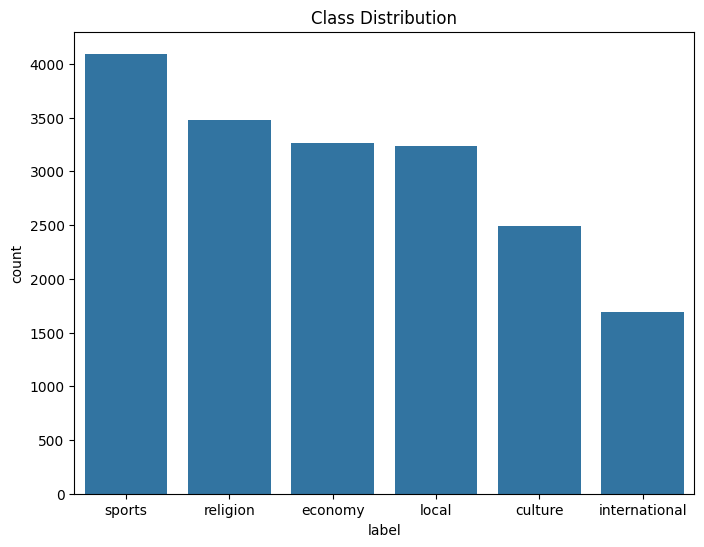

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title('Class Distribution')
plt.show()

##Import ML Libraries and Tools

Importing the required classifiers, evaluation metrics, feature extractor (TF-IDF), and data splitting function.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


##Define Evaluation Function

This function trains the given model, evaluates its performance using accuracy and classification report, and displays a confusion matrix.


In [ ]:
def evaluate_model(model, model_name):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)

    accuracy = accuracy_score(y_test, y_pred) *100

    print(f"===== {model_name} =====")
    print(f"\nAccuracy: {accuracy:.2f}%\n")

    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy


##Train/Test Split & TF-IDF Vectorization

Splitting the cleaned text into training and testing sets, and converting the text data into numerical vectors using TF-IDF with unigrams and bigrams.


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

# Feature extraction
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

##Naive Bayes Classification

Training and evaluating the Multinomial Naive Bayes model.


===== Naive Bayes =====

Accuracy: 90.53%

Classification Report:
                precision    recall  f1-score   support

      culture       0.90      0.83      0.86       480
      economy       0.90      0.83      0.87       670
international       0.91      0.94      0.92       342
        local       0.78      0.88      0.83       663
     religion       0.94      0.98      0.96       695
       sports       0.99      0.96      0.98       802

     accuracy                           0.91      3652
    macro avg       0.90      0.90      0.90      3652
 weighted avg       0.91      0.91      0.91      3652



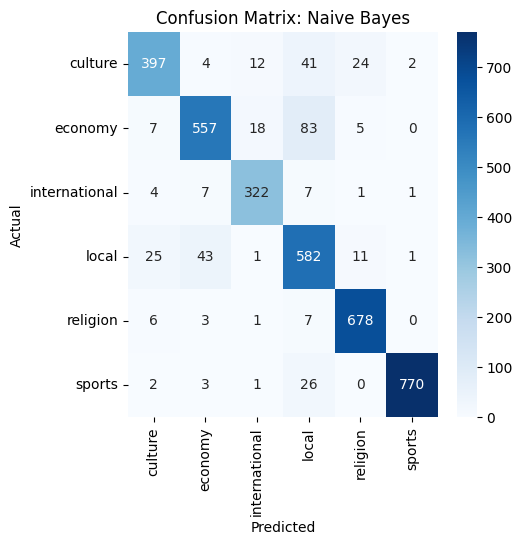

In [ ]:
# Training and Evaluting Multinomial Naive Bayes
multi_NB_model = MultinomialNB()
multi_NB_acc = evaluate_model(multi_NB_model, "Naive Bayes")

## Classify new texts using the trained Naive Bayes model

In [ ]:

new_texts = [
    "الاقتصاد العالمي يواجه تحديات جديدة",
    "فاز المنتخب بالمباراة النهائية",
    "تم افتتاح معرض ثقافي في المدينة"
]

# Clean and transform the new texts
new_cleaned = [clean_arabic_text(text) for text in new_texts]
new_vec = vectorizer.transform(new_cleaned)
predictions = multi_NB_model.predict(new_vec)

# Display predictions
for text, label in zip(new_texts, predictions):
    print(f"Text: {text}\n→ Predicted Label: {label}\n")


Text: الاقتصاد العالمي يواجه تحديات جديدة
→ Predicted Label: economy

Text: فاز المنتخب بالمباراة النهائية
→ Predicted Label: sports

Text: تم افتتاح معرض ثقافي في المدينة
→ Predicted Label: culture



##Support Vector Machine (SVM)

Training and evaluating the SVM model using LinearSVC.

===== SVM =====

Accuracy: 94.28%

Classification Report:
                precision    recall  f1-score   support

      culture       0.95      0.91      0.93       480
      economy       0.90      0.90      0.90       670
international       0.96      0.95      0.96       342
        local       0.87      0.89      0.88       663
     religion       0.98      1.00      0.99       695
       sports       0.99      0.99      0.99       802

     accuracy                           0.94      3652
    macro avg       0.94      0.94      0.94      3652
 weighted avg       0.94      0.94      0.94      3652



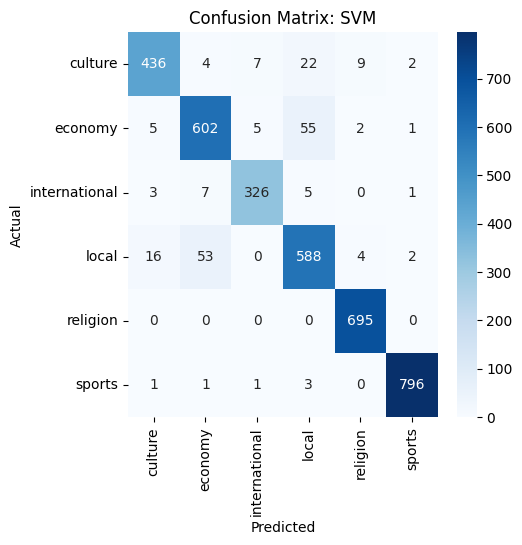

In [ ]:
# Training and Evaluting SVM
svm_model = LinearSVC()
svm_acc = evaluate_model(svm_model, "SVM")

## Classify new texts using the trained SVM model

In [ ]:

new_texts = [
    "الاقتصاد العالمي يواجه تحديات جديدة",
    "فاز المنتخب بالمباراة النهائية",
    "تم افتتاح معرض ثقافي في المدينة"
]

# Clean and transform the new texts
new_cleaned = [clean_arabic_text(text) for text in new_texts]
new_vec = vectorizer.transform(new_cleaned)
predictions = svm_model.predict(new_vec)

# Display predictions
for text, label in zip(new_texts, predictions):
    print(f"Text: {text}\n→ Predicted Label: {label}\n")



Text: الاقتصاد العالمي يواجه تحديات جديدة
→ Predicted Label: economy

Text: فاز المنتخب بالمباراة النهائية
→ Predicted Label: sports

Text: تم افتتاح معرض ثقافي في المدينة
→ Predicted Label: culture



##Random Forest Classifier

Training and evaluating the Random Forest model with 100 estimators.

===== Random Forest =====

Accuracy: 92.06%

Classification Report:
                precision    recall  f1-score   support

      culture       0.91      0.84      0.87       480
      economy       0.89      0.87      0.88       670
international       0.92      0.92      0.92       342
        local       0.83      0.87      0.85       663
     religion       0.98      1.00      0.99       695
       sports       0.98      0.99      0.99       802

     accuracy                           0.92      3652
    macro avg       0.92      0.91      0.92      3652
 weighted avg       0.92      0.92      0.92      3652



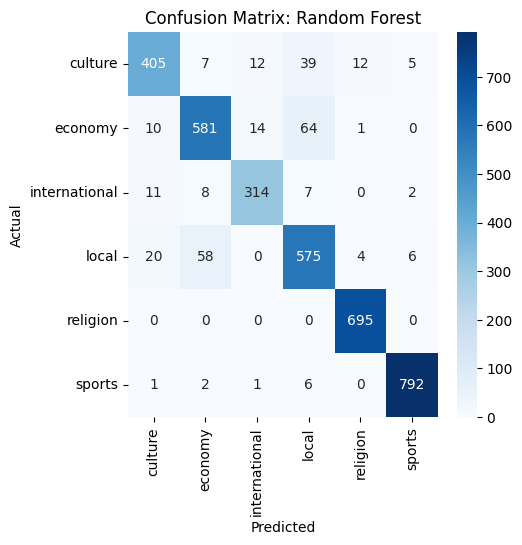

In [ ]:
# Training and Evaluating Random forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_acc = evaluate_model(rf_model, "Random Forest")

##Classify new texts using the trained Random Forest model

In [ ]:

new_texts = [
    "الاقتصاد العالمي يواجه تحديات جديدة",
    "فاز المنتخب بالمباراة النهائية",
    "تم افتتاح معرض ثقافي في المدينة"
]

# Clean and transform the new texts
new_cleaned = [clean_arabic_text(text) for text in new_texts]
new_vec = vectorizer.transform(new_cleaned)
predictions = rf_model.predict(new_vec)

# Display predictions
for text, label in zip(new_texts, predictions):
    print(f"Text: {text}\n→ Predicted Label: {label}\n")


Text: الاقتصاد العالمي يواجه تحديات جديدة
→ Predicted Label: culture

Text: فاز المنتخب بالمباراة النهائية
→ Predicted Label: sports

Text: تم افتتاح معرض ثقافي في المدينة
→ Predicted Label: culture



##Compare Model Accuracies

This chart compares the accuracy of Naive Bayes, SVM, and Random Forest classifiers.


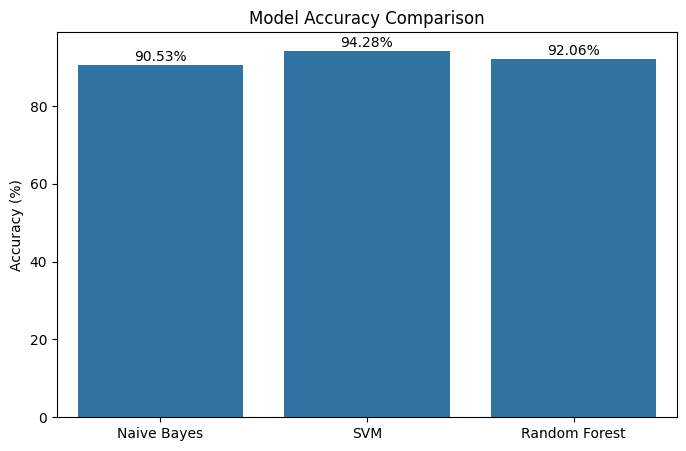

In [ ]:
# Compare results

model_names = ["Naive Bayes", "SVM", "Random Forest"]
model_accuracies = [multi_NB_acc,svm_acc, rf_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=model_accuracies)

plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")

for i, acc in enumerate(model_accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center')
plt.show()


##**## Task 2: Text Summarization**

##Install Extra NLP Libraries

Installing additional libraries: rouge for summarization evaluation, pyarabic for Arabic processing, and sumy for text summarization.


In [ ]:
!pip install rouge
!pip install pyarabic
!pip install sumy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 68.4 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=2b682715cb4917551d73bb05dfa7d4c279e31cabecbcbbec7568c620767eb95c
  Stored in directory: /root/.cache/pip/wheels/4d/57/58/7e3d7fedf51fe248b7fcee3df6945ae28638e22cddf01eb92b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=4aa823765e9b1689a4368a1738a5b9567a3b345119f02238af6d58c3ad415120
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built breadability docopt


##Import Summarization and Evaluation Tools

Importing required tools for extractive summarization and evaluation using BLEU and ROUGE scores.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer


##LexRank Summarization Function

Defines a function that generates a summary from the input text using the LexRank algorithm (unsupervised extractive summarization).


In [ ]:
def lexrank_summary(text, num_sentences=3):
    try:
        parser = PlaintextParser.from_string(text, Tokenizer("english"))
        summarizer = LexRankSummarizer()
        summary_sentences = summarizer(parser.document, num_sentences)
        return ' '.join(str(sentence) for sentence in summary_sentences)
    except Exception as e:
        return text  # fallback if there's a parsing issue


##Apply LexRank on Sample Texts

This cell applies the LexRank summarization function on the first 3 samples of the dataset and stores the result in a new column.


In [ ]:
df_sample = df.head(3).copy()
df_sample['summary'] = df_sample['text'].apply(lambda x: lexrank_summary(x, num_sentences=3))


##Evaluate Summaries using BLEU and ROUGE

This cell evaluates the generated summaries using:
- BLEU-1: Precision-based score for n-gram overlap
- ROUGE-1: Recall-based score for unigram overlap


In [ ]:
rouge = Rouge()
smoothing_fn = SmoothingFunction().method1

bleu_scores = []
rouge_scores = []

for idx, row in df_sample.iterrows():
    reference = row['text']
    hypothesis = row['summary']

    # Tokenize
    ref_tokens = word_tokenize(reference)
    hyp_tokens = word_tokenize(hypothesis)

    # BLEU-1
    try:
        bleu = sentence_bleu([ref_tokens], hyp_tokens, weights=(1, 0, 0, 0), smoothing_function=smoothing_fn)
    except:
        bleu = 0.0
    bleu_scores.append(bleu)

    # ROUGE-1
    try:
        scores = rouge.get_scores(hypothesis, reference)
        rouge_scores.append(scores[0]['rouge-1']['f'])
    except:
        rouge_scores.append(0.0)


##Average Evaluation Scores

Calculating and displaying the average BLEU-1 and ROUGE-1 F1 scores for the sample summaries.


In [ ]:
avg_bleu = np.mean(bleu_scores)
avg_rouge1 = np.mean(rouge_scores)

print(f"Average BLEU-1 Score: {avg_bleu:.2f}")
print(f"Average ROUGE-1 F1 Score: {avg_rouge1:.2f}")


Average BLEU-1 Score: 0.28
Average ROUGE-1 F1 Score: 0.49


##View Original Text Sample

Displaying the original text of the first sample in the dataset.


In [ ]:
df_sample['text'][1]

'هوليوود ( الولايات المتحدة ) ( ا ف ب ) : يتوقع ان يحصد الجزء الثالث من فيلم ملك الخواتم الذي يحمل عنوان عودة الملك عددا من جوائز الاوسكار الاهم في مجال السينما الاميركية خلال حفل توزيعها الاحد في هوليوود . وكان نجوم هوليوود يرتدون العام الماضي ملابس سوداء في حفل اثار جدلا قبل اربعة ايام من شن الحرب على العراق . وفي عام 2001 انعكست اعتداءات 11 سبتمبر سلبا على اجواء حفل توزيع جوائز الاوسكار . وقالت مصممة الازياء الاميركية اليترا كازاداي : ان العام 2004 سيعيد البريق والتألق . وستعود التصاميم الرائعة المصنوعة من الحرير الى الواجهة مع المجوهرات الفريدة . وتقررت اسماء الفائزين الثلاثاء المهلة المحددة ل 5800 شخص من الاخصائين في مجال السينما لتسليم بطاقات التصويت لاكاديمية الفنون والتقنيات السينمائية . ومع اقتراب اليوم الحاسم لا احد يتوقع حصول مفاجآت والامور محسومة في حين تزداد حدة التوتر في صفوف المرشحين . وقال تيم غراي مدير الاعلام في مجلة دايلي فرايتي المتخصصة في المجال السينمائي : انه يمكن ربط المرشحين لجوائز الاوسكار بوضوح بكل فئة . ولم يفسح الجدل المثار حول فيلم آلام المسيح للمخرج ميل غ

##Generated Summary Example

Displaying the LexRank-generated summary for the first sample.


In [ ]:
df_sample['summary'][1]

'هوليوود ( الولايات المتحدة ) ( ا ف ب ) : يتوقع ان يحصد الجزء الثالث من فيلم ملك الخواتم الذي يحمل عنوان عودة الملك عددا من جوائز الاوسكار الاهم في مجال السينما الاميركية خلال حفل توزيعها الاحد في هوليوود . وقال ريتشارد جويل مساعد عميد كلية السينما في جامعة يو اس سي ان فيلم آلام المسيح استحوذ على الساحة في الايام الماضية ولم يترك المجال للبريق التقليدي الذي يحيط بحفل توزيع جوائز الاوسكار . وما زال تيم روبنز الاوفر حظا للفوز بجائزة اوسكار عن افضل دور ثانوي في ميستيك ريفر .'

##Conclusion

Traditional machine learning methods proved to be effective for Arabic text classification when combined with proper preprocessing and TF-IDF feature extraction. Among the models tested, Support Vector Machine and Random Forest achieved the highest accuracy. The experiment also showed that using stemming and n-gram features helped improve performance. Although not the focus of this assignment, the LexRank-based summarization experiment provided basic extractive summaries, with evaluation scores indicating reasonable content retention. Future work may involve expanding the dataset, addressing class imbalance, and exploring deep learning approaches for comparison.
